# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

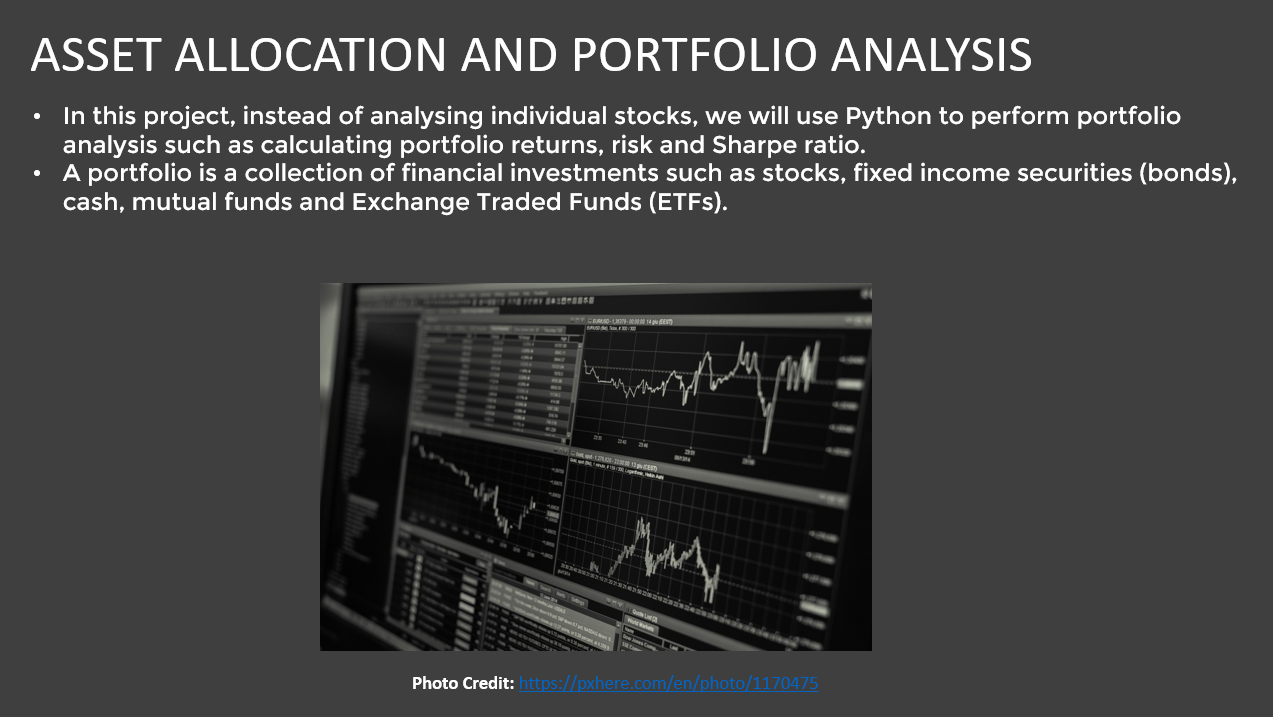

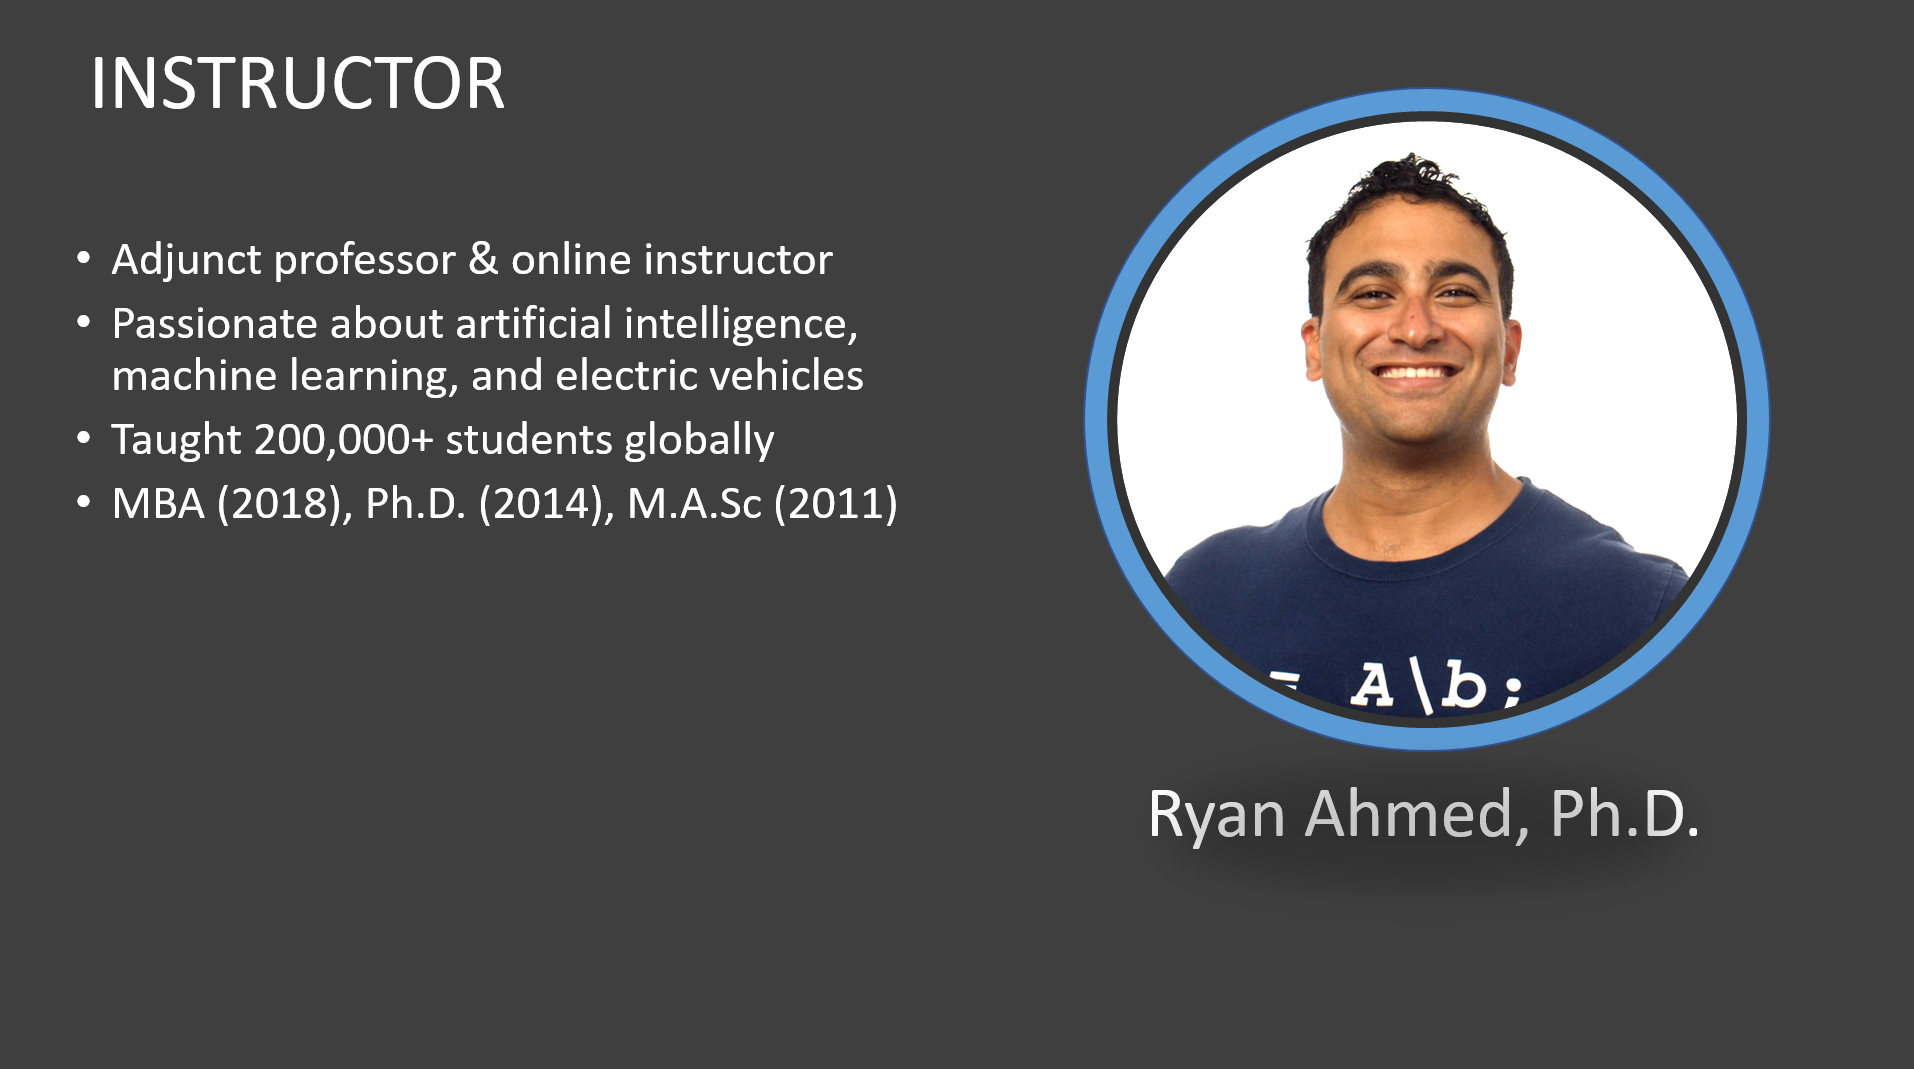

# TASK #2: IMPORT LIBRARIES & DATASETS AND PERFORM DATA VISUALIZATION

In [70]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [71]:
# Read the stock data file
df = pd.read_csv('stock_data.csv')
df.head()

,Date,FB,TWTR,NFLX
0,2013-11-07,47.560001,44.900002,46.694286
1,2013-11-08,47.529999,41.650002,47.842857
2,2013-11-11,46.200001,42.900002,48.272858
3,2013-11-12,46.610001,41.900002,47.675713
4,2013-11-13,48.709999,42.599998,47.897144


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1712 entries, 0 to 1711
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1712 non-null   object 
 1   FB      1712 non-null   float64
 2   TWTR    1712 non-null   float64
 3   NFLX    1712 non-null   float64
dtypes: float64(3), object(1)
memory usage: 53.6+ KB


In [73]:
# Function to plot interactive plot
def interactive_plot(df,title):
    fig = px.line(title = title)
    for i in df.columns[1:]:
        fig.add_scatter(x = df['Date'], y = df[i],name = i)
    fig.show()
        

In [74]:
# Plot interactive chart
interactive_plot(df,'Stock Prices')

MINI CHALLENGE #1: 
- Create a function to perform scaling or normalization
- Apply the function to the stocks dataframe and perform sanity check

In [75]:
def scaling(df):
    df_copy = df.copy()
    for i in df.columns[1:]:
        df_copy[i] =  (df_copy[i]/df_copy[i][0])
    return df_copy
        

In [76]:
interactive_plot(scaling(df),'Stock Price Scaled')

# TASK #3: UNERSTAND THE CONCEPT OF ASSET ALLOCATION

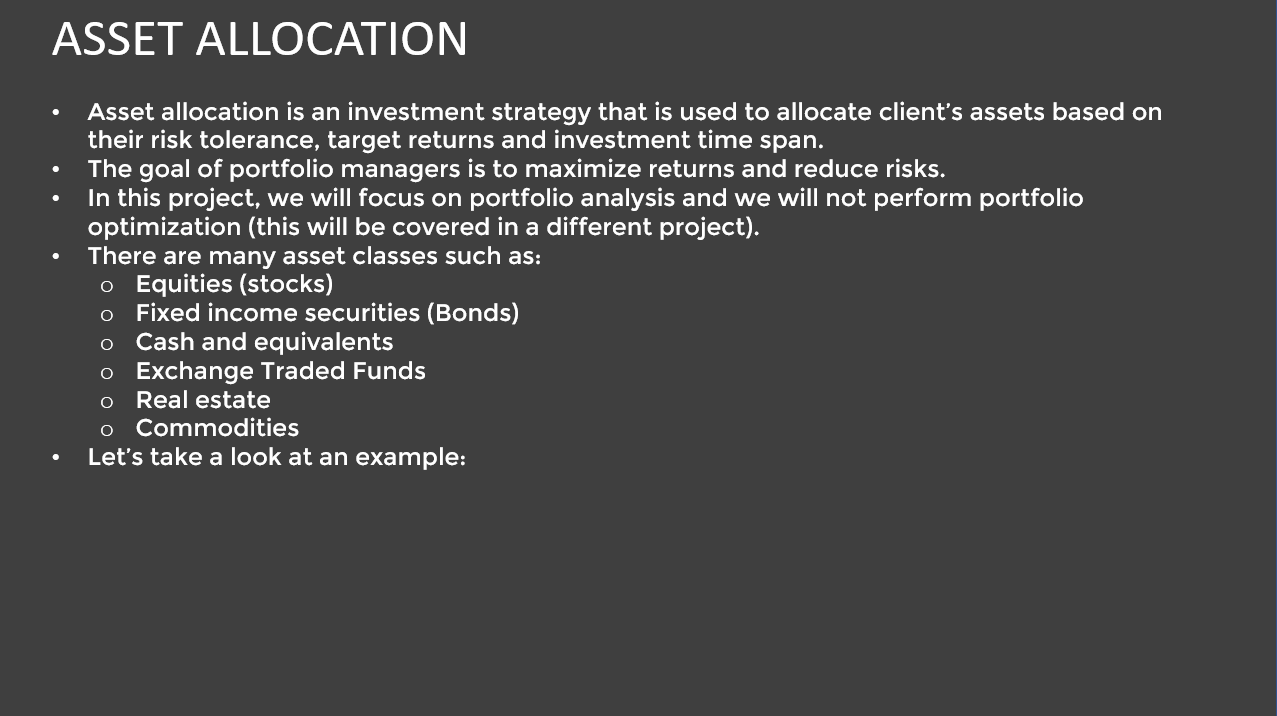

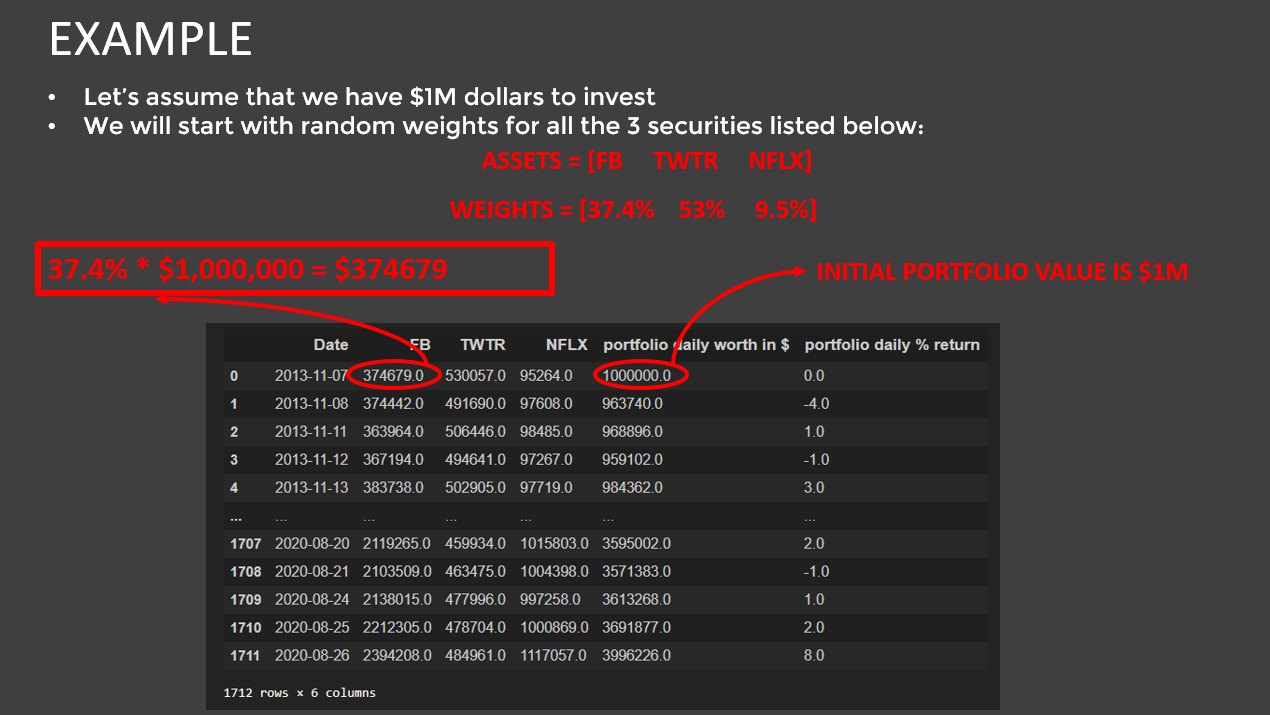

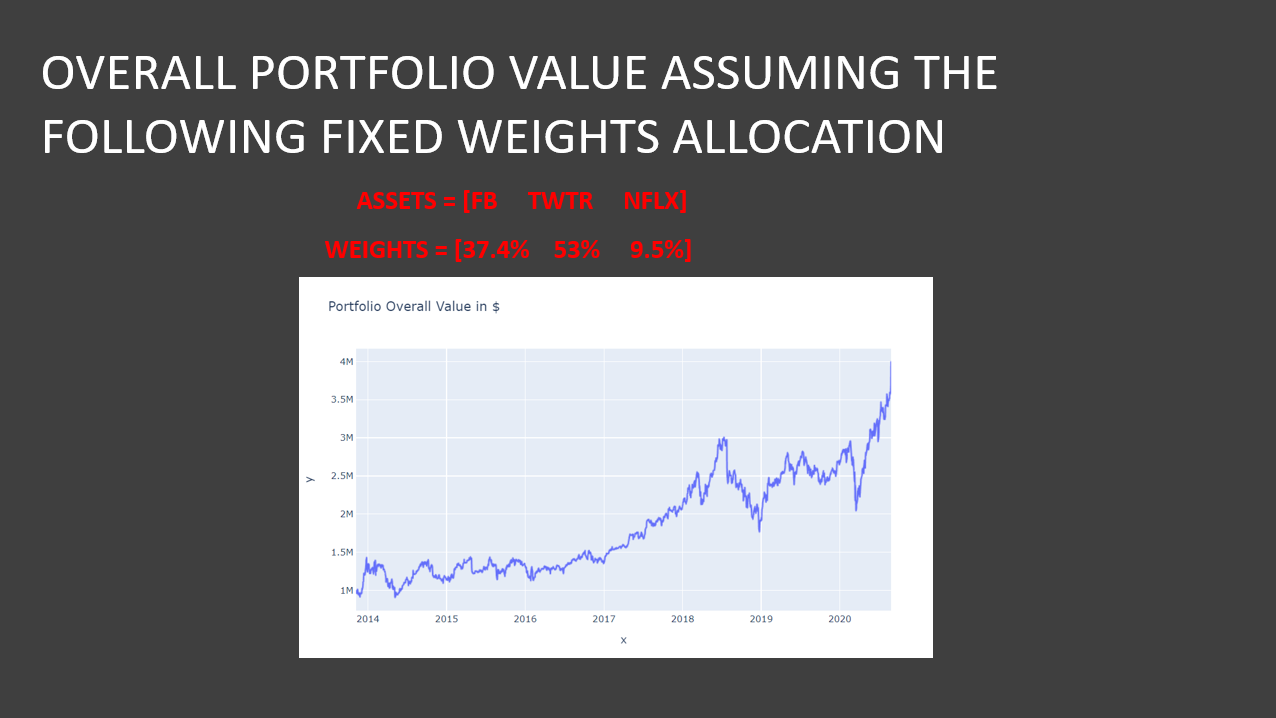

MINI CHALLENGE #2:
- What is the common advice that financial advisors generally give to retired seniors when it comes to asset allocations?

Ans. 100 - age

# TASK #4: PERFORM RANDOM ASSET ALLOCATION AND CALCULATE PORTFOLIO DAILY RETURN

In [77]:
# Let's create random portfolio weights
# Portfolio weights must sum to 1 

# Set random seed
# np.random.seed(101)

# Create random weights for the stocks and normalize them

# Ensure that the sum of all weights are = 1
x = np.random.random(3)
x /= np.sum(x)
weights = x

In [78]:
# Normalize the stock avalues 
df_portfolio = scaling(df)

In [79]:
df_portfolio.to_csv('normalized_stocks.csv',index=False)

In [80]:
# Note that enumerate returns the value and a counter as well
for counter, stock in enumerate(df_portfolio.columns[1:]):
  df_portfolio[stock] = df_portfolio[stock] * weights[counter]
  df_portfolio[stock] = df_portfolio[stock] * 1000000
df_portfolio.round(decimals = 0)

,Date,FB,TWTR,NFLX
0,2013-11-07,325853.0,347681.0,326465.0
1,2013-11-08,325648.0,322515.0,334495.0
2,2013-11-11,316536.0,332195.0,337502.0
3,2013-11-12,319345.0,324451.0,333327.0
4,2013-11-13,333733.0,329871.0,334875.0
...,...,...,...,...
1707,2020-08-20,1843100.0,301685.0,3481089.0
1708,2020-08-21,1829397.0,304008.0,3442006.0
1709,2020-08-24,1859406.0,313533.0,3417536.0
1710,2020-08-25,1924015.0,313997.0,3429911.0


In [81]:
# Let's create an additional column that contains the sum of all $ values in the portfolio
df_portfolio['portfolio daily worth in $'] = df_portfolio.drop('Date',axis = 1).sum(axis = 1)
df_portfolio

,Date,FB,TWTR,NFLX,portfolio daily worth in $
0,2013-11-07,3.258534e+05,347681.478947,3.264651e+05,1.000000e+06
1,2013-11-08,3.256479e+05,322515.226024,3.344954e+05,9.826585e+05
2,2013-11-11,3.165355e+05,332194.554072,3.375017e+05,9.862318e+05
3,2013-11-12,3.193446e+05,324451.091634,3.333268e+05,9.771225e+05
4,2013-11-13,3.337326e+05,329871.484366,3.348749e+05,9.984790e+05
...,...,...,...,...,...
1707,2020-08-20,1.843100e+06,301685.288836,3.481089e+06,5.625874e+06
1708,2020-08-21,1.829397e+06,304008.319824,3.442006e+06,5.575412e+06
1709,2020-08-24,1.859406e+06,313532.809596,3.417536e+06,5.590475e+06
1710,2020-08-25,1.924015e+06,313997.394112,3.429911e+06,5.667923e+06


In [82]:
# Let's calculate the portfolio daily return 
# Define a new column in the dataframe and set it to zeros
df_portfolio['portfolio daily % return'] = 0.0000

for i in range(1, len(df)):
  # Calculate the percentage of change from the previous day
  df_portfolio['portfolio daily % return'][i] = ( (df_portfolio['portfolio daily worth in $'][i] - df_portfolio['portfolio daily worth in $'][i-1]) / df_portfolio['portfolio daily worth in $'][i-1]) * 100 

df_portfolio.round(decimals = 0)

,Date,FB,TWTR,NFLX,portfolio daily worth in $,portfolio daily % return
0,2013-11-07,325853.0,347681.0,326465.0,1000000.0,0.0
1,2013-11-08,325648.0,322515.0,334495.0,982658.0,-2.0
2,2013-11-11,316536.0,332195.0,337502.0,986232.0,0.0
3,2013-11-12,319345.0,324451.0,333327.0,977122.0,-1.0
4,2013-11-13,333733.0,329871.0,334875.0,998479.0,2.0
...,...,...,...,...,...,...
1707,2020-08-20,1843100.0,301685.0,3481089.0,5625874.0,3.0
1708,2020-08-21,1829397.0,304008.0,3442006.0,5575412.0,-1.0
1709,2020-08-24,1859406.0,313533.0,3417536.0,5590475.0,0.0
1710,2020-08-25,1924015.0,313997.0,3429911.0,5667923.0,1.0


MINI CHALLENGE #3: 
- Try at least 3 another random weights allocation and rerun the code. 
- Compare the final portfolio value on Aug 26th, 2020 to its initial value ($1M) on November 7th, 2013. Do you notice a big difference? Comment on your answer.

# TASK #5: PORTFOLIO ALLOCATION - DAILY RETURN/WORTH CALCULATION (FUNCTION)

In [83]:
# Lets assume we have $1,000,000 to be invested and we will allocate this fund based on the weights of the stocks
# We will create a function that takes in the stock prices along with the weights and retun:
# (1) Daily value of each individual securuty in $ over the specified time period
# (2) Overall daily worth of the entire portfolio 
# (3) Daily return 

def portfolio_allocation(df, weights):

  df_portfolio = df.copy()
  
  # Normalize the stock avalues 
  df_portfolio = scaling(df_portfolio)
    
  for counter, stock in enumerate(df_portfolio.columns[1:]):
    df_portfolio[stock] = df_portfolio[stock] * weights[counter]
    df_portfolio[stock] = df_portfolio[stock] * 1000000

  df_portfolio['portfolio daily worth in $'] = df_portfolio.drop('Date',axis=1).sum(axis = 1)
  
  df_portfolio['portfolio daily % return'] = 0.0000

  for i in range(1, len(df)):
    
    # Calculate the percentage of change from the previous day
    df_portfolio['portfolio daily % return'][i] = ( (df_portfolio['portfolio daily worth in $'][i] - df_portfolio['portfolio daily worth in $'][i-1]) / df_portfolio['portfolio daily worth in $'][i-1]) * 100 
  
  # set the value of first row to zero, as previous value is not available
  df_portfolio['portfolio daily % return'][0] = 0
  return df_portfolio

In [84]:
# Call the function
df_portfolio = portfolio_allocation(df, weights)
df_portfolio

,Date,FB,TWTR,NFLX,portfolio daily worth in $,portfolio daily % return
0,2013-11-07,3.258534e+05,347681.478947,3.264651e+05,1.000000e+06,0.000000
1,2013-11-08,3.256479e+05,322515.226024,3.344954e+05,9.826585e+05,-1.734153
2,2013-11-11,3.165355e+05,332194.554072,3.375017e+05,9.862318e+05,0.363639
3,2013-11-12,3.193446e+05,324451.091634,3.333268e+05,9.771225e+05,-0.923652
4,2013-11-13,3.337326e+05,329871.484366,3.348749e+05,9.984790e+05,2.185652
...,...,...,...,...,...,...
1707,2020-08-20,1.843100e+06,301685.288836,3.481089e+06,5.625874e+06,2.514731
1708,2020-08-21,1.829397e+06,304008.319824,3.442006e+06,5.575412e+06,-0.896972
1709,2020-08-24,1.859406e+06,313532.809596,3.417536e+06,5.590475e+06,0.270174
1710,2020-08-25,1.924015e+06,313997.394112,3.429911e+06,5.667923e+06,1.385363


# TASK #6: PERORM PORTFOLIO DATA VISUALIZATION

In [85]:
# Plot the portfolio daily return
fig = px.line(x= df_portfolio['Date'], y =df_portfolio['portfolio daily % return'],title = 'portfolio daily % return')
fig.show()


In [86]:
# Plot all stocks (normalized)
interactive_plot(df_portfolio.drop('portfolio daily % return',axis =1),'All Stocks')

In [87]:
df_portfolio.to_csv('unoptimized_investment.csv',index = False)

In [88]:
df_portfolio.head()

,Date,FB,TWTR,NFLX,portfolio daily worth in $,portfolio daily % return
0,2013-11-07,325853.438818,347681.478947,326465.082235,1000000.000000,0.000000
1,2013-11-08,325647.882580,322515.226024,334495.365126,982658.473730,-1.734153
2,2013-11-11,316535.510570,332194.554072,337501.735366,986231.800008,0.363639
3,2013-11-12,319344.591880,324451.091634,333326.770756,977122.454270,-0.923652
4,2013-11-13,333732.555619,329871.484366,334874.914990,998478.954975,2.185652


In [89]:
# Print out a histogram of daily returns
fig = px.histogram(df_portfolio,x = 'portfolio daily % return')
fig.show()

In [90]:
df_portfolio['portfolio daily % return'].describe()

count    1712.000000
mean        0.127195
std         2.011794
min       -12.520031
25%        -0.813853
50%         0.125121
75%         1.199897
max         9.888488
Name: portfolio daily % return, dtype: float64

In [91]:
def compound_interest(principle, rate, time):
 
    # Calculates compound interest
    Amount = principle * (pow((1 + rate / 100), time))
    CI = Amount - principle
    print("Compound interest is", CI)
 
compound_interest(1000000,0.164867,252*7)

Compound interest is 17280942.728392567


MINI CHALLENGE #4: 
- Try at least 3 another random weights allocations and visualize the overall portfolio value in $$. 
- Compare the final portfolio value on Aug 26th, 2020 to its initial value ($1M) on November 7th, 2013. Do you notice a big difference? Comment on your answer.

# TASK #7: UNDERSTAND PORTFOLIO STATISTICAL METRICS (CUMMULATIVE RETURN, AVERAGE DAILY RETURN, AND SHARPE RATIO)

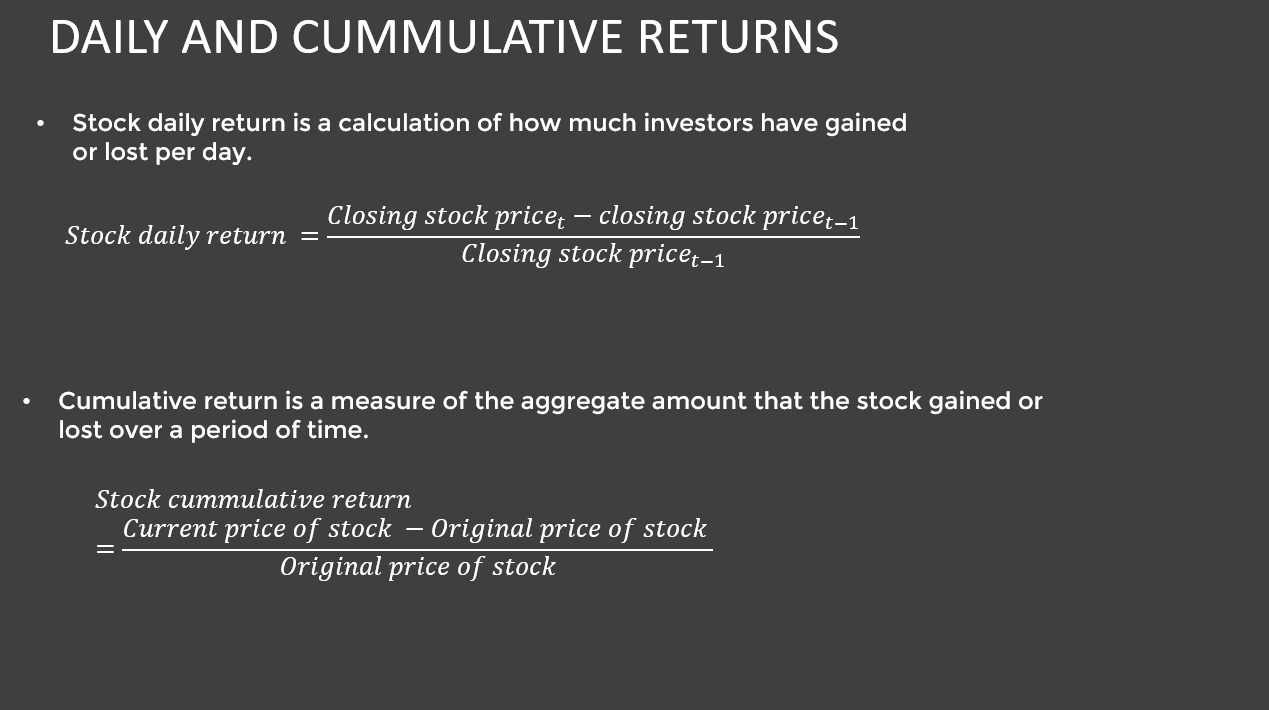

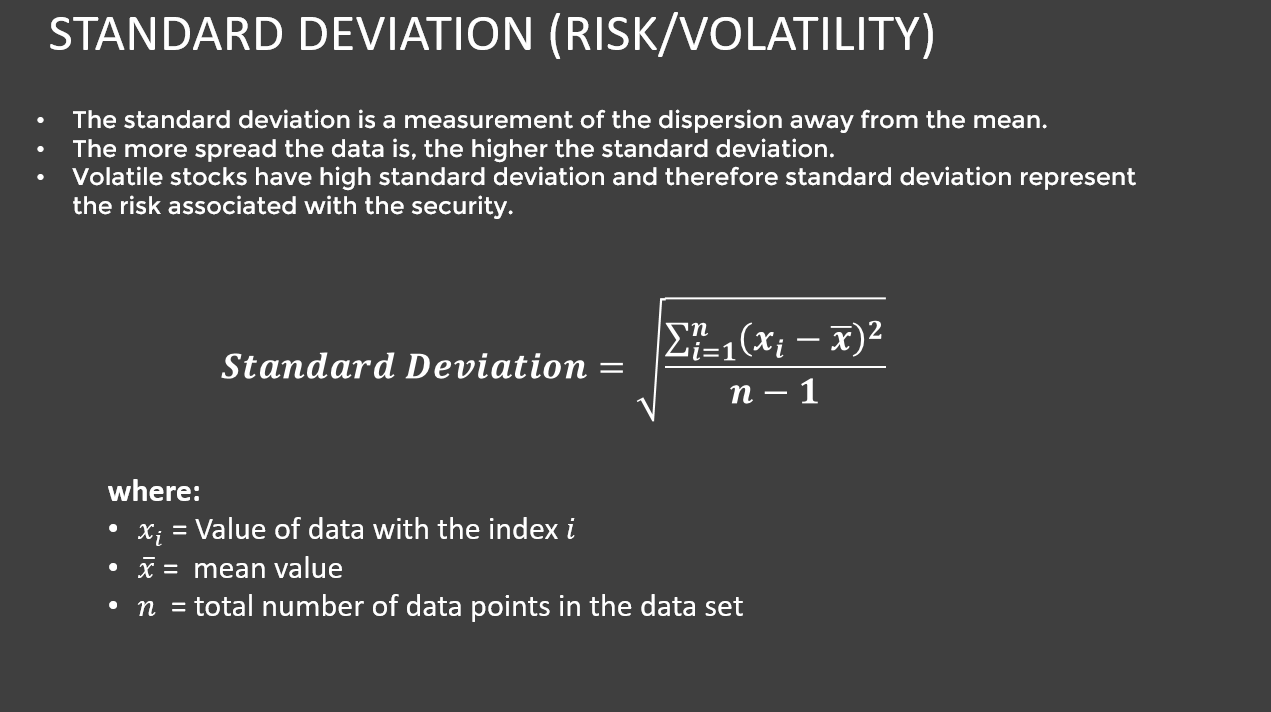

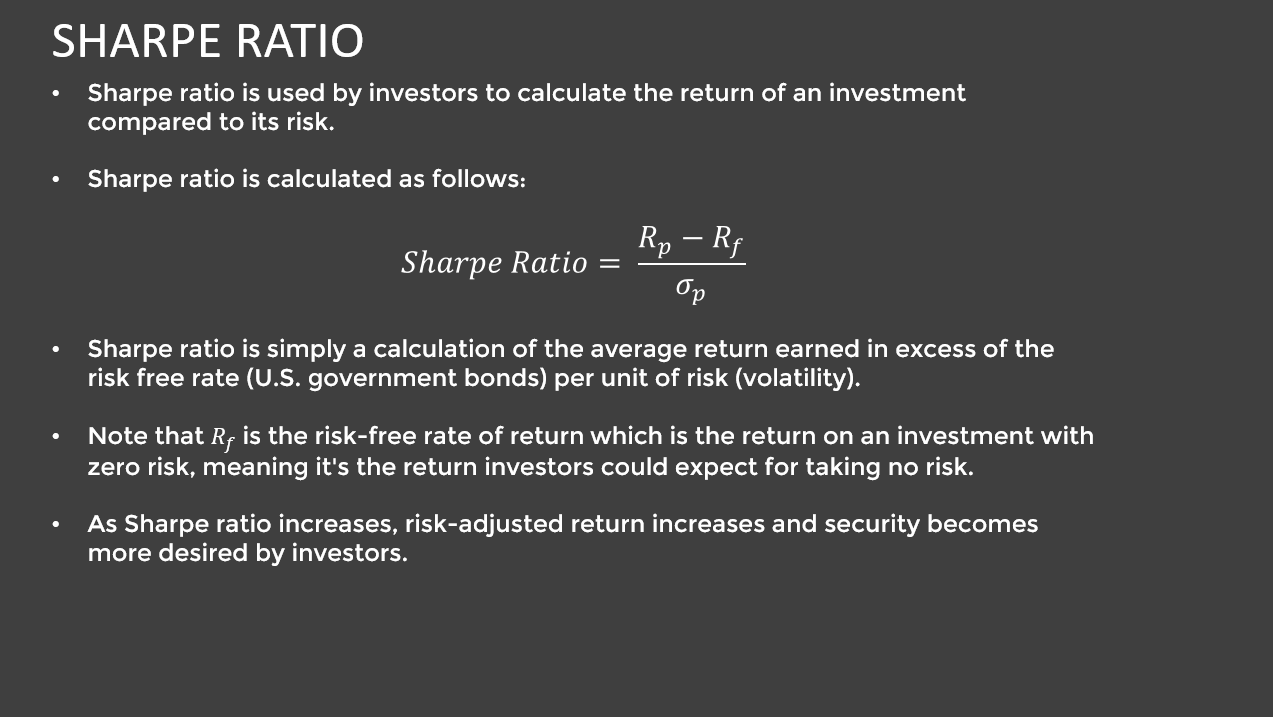

# TASK #8: CALCULATE PORTFOLIO STATISTICAL METRICS (CUMMULATIVE RETURN, AVERAGE DAILY RETURN, AND SHARPE RATIO)

In [92]:
# Cummulative return of the portfolio (Note that we now look for the last net worth of the portfolio compared to it's start value)
cummulative_return = ((df_portfolio['portfolio daily worth in $'].values[-1] - df_portfolio['portfolio daily worth in $'][0])/ df_portfolio['portfolio daily worth in $'][0]) * 100
print('Cummulative return of the portfolio is {} %'.format(cummulative_return))


Cummulative return of the portfolio is 522.8395306835768 %


In [93]:
# Calculate the portfolio standard deviation


In [94]:
# Calculate the average daily return 


In [95]:
# Portfolio sharpe ratio
# 252 days of trade in year
sharpe_ratio = df_portfolio['portfolio daily % return'].mean() / df_portfolio['portfolio daily % return'].std() * np.sqrt(252)
print('Sharpe ratio of the portfolio is {}'.format(sharpe_ratio))

Sharpe ratio of the portfolio is 1.0036589475135156


MINI CHALLENGE #5: 
- Try at least 3 different random weights allocation, rerun the code and compare sharpe ratios, daily return and cummulative returns.

In [96]:
df_portfolio

,Date,FB,TWTR,NFLX,portfolio daily worth in $,portfolio daily % return
0,2013-11-07,3.258534e+05,347681.478947,3.264651e+05,1.000000e+06,0.000000
1,2013-11-08,3.256479e+05,322515.226024,3.344954e+05,9.826585e+05,-1.734153
2,2013-11-11,3.165355e+05,332194.554072,3.375017e+05,9.862318e+05,0.363639
3,2013-11-12,3.193446e+05,324451.091634,3.333268e+05,9.771225e+05,-0.923652
4,2013-11-13,3.337326e+05,329871.484366,3.348749e+05,9.984790e+05,2.185652
...,...,...,...,...,...,...
1707,2020-08-20,1.843100e+06,301685.288836,3.481089e+06,5.625874e+06,2.514731
1708,2020-08-21,1.829397e+06,304008.319824,3.442006e+06,5.575412e+06,-0.896972
1709,2020-08-24,1.859406e+06,313532.809596,3.417536e+06,5.590475e+06,0.270174
1710,2020-08-25,1.924015e+06,313997.394112,3.429911e+06,5.667923e+06,1.385363


# WELL DONE!

# MINI CHALLENGE SOLUTIONS

MINI CHALLENGE #1 SOLUTION: 
- Create a function to perform scaling or normalization
- Apply the function to the stocks dataframe and perform sanity check

In [97]:
# Function to normalize the prices based on the initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

MINI CHALLENGE #2 SOLUTION:
- What is the common advice that financial advisors generally recommend to retired seniors when it comes to asset allocations?

In [98]:
# The conventional wisdom is to subtract client's age from 100 to calculate the % of portolio that should be allocated to stocks
# For Example: If you're 30 years old, you should have 70% allocated to stocks
# If you are 75 years old, you should invest 25% in stocks (old retired seniors generally recommend a more stable low risk portfolio). 

MINI CHALLENGE #3 SOLUTION: 
- Try at least 3 another random weights allocation and rerun the code. 
- Compare the final portfolio value on Aug 26th, 2020 to its initial value ($1M) on November 7th, 2013. Do you notice a big difference? Comment on your answer.

In [99]:
# remove the seed value of 101, run the code 3 times, and record the final portolio value on the last day (Aug 26th, 2020)
np.random.seed()

# Portfolio Value Run #1 = $6,977,352 and weights = [0.36740875 0.25789378 0.37469747]
# Portfolio Value Run #2 = $8,828,018 and weights = [0.39360079 0.0737817  0.53261751]
# Portfolio Value Run #3 = $9,256,843 and weights = [0.31229238 0.07424618 0.61346144]



MINI CHALLENGE #4 SOLUTION: 
- Try at least 3 another random weights allocations and visualize the overall portfolio value in $$. 
- Compare the final portfolio value on Aug 26th, 2020 to its initial value ($1M) on November 7th, 2013. Do you notice a big difference? Comment on your answer.

In [100]:
# 3 Rerun the code 3 times and visualize the portfolio value in $$ (no changes are necessary)

MINI CHALLENGE #5 SOLUTION: 
- Try at least 3 different random weights allocation, rerun the code and compare sharpe ratios, daily return and cummulative returns.

In [101]:
# Rerun the code with 3 random values and compare metrics